<a href="https://colab.research.google.com/github/Naybellez/Cur_Tea/blob/main/CIFAR_Basic_antmod_torch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# the most basic CNN built in torch. 
# to be trained on CIFAR-10
# 100523

In [2]:
# imports

import torch
import torch.nn as nn
import numpy as np
from sklearn.model_selection import train_test_split
import random
import matplotlib.pyplot as plt

from keras.datasets import cifar10

import cv2
from torch.nn import functional


In [3]:
# load dataset

random_seed = random.seed()

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

x_train, x_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  test_size = 0.1, train_size=0.9,
                                      random_state=random_seed, shuffle = True)

170498071/170498071 [==============================] - 12s 0us/step


In [4]:
print('train: ', len(x_train), len(y_train))
print('val: ', len(x_val), len(y_val))
print('test: ', len(x_train), len(y_train))

train:  45000 45000
val:  5000 5000
test:  45000 45000


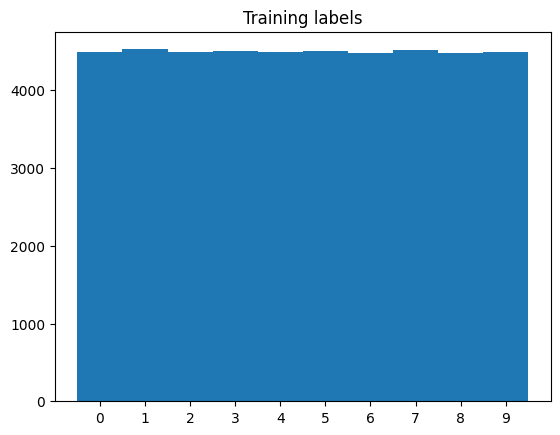

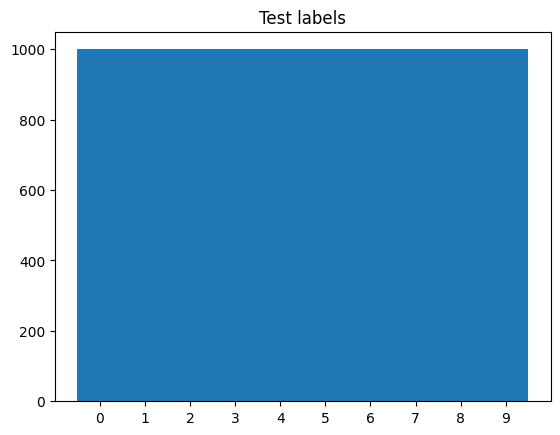

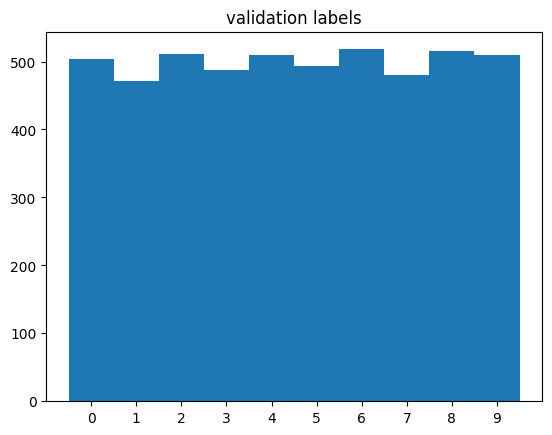

In [5]:
def label_dist_plot(data, label):
  plt.figure()
  _, _, _ = plt.hist(data, bins=[0, 1, 2,3,4,5,6,7,8,9,10], align='left')
  plt.xticks(np.unique(data))
  plt.xlim(left=min(np.unique(data))-1, right=max(np.unique(data))+1)
  plt.title(label)
  plt.show()


label_dist_plot(y_train, 'Training labels')
label_dist_plot(y_test, 'Test labels')
label_dist_plot(y_val, 'validation labels')

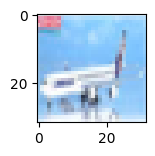

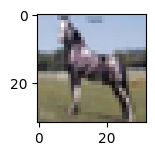

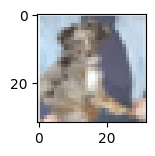

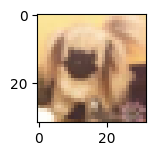

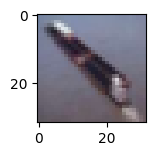

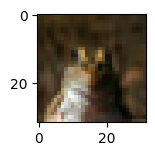

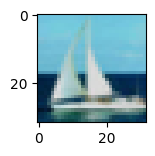

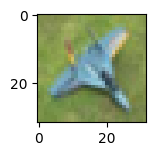

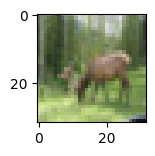

In [6]:
# look at imgs

for i in range(9):  
  plt.subplot(330 + 1 + i)
  plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
  plt.show()

In [7]:
# check shape of imgs

print('image shape: ', x_train[1].shape)

image shape:  (32, 32, 3)


In [8]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")


Using cpu device


In [ ]:
            """nn.Conv2d(3, out_channels=9, kernel_size=3, padding=2),
            nn.Sigmoid(),
            nn.Dropout(p=0.3),
            nn.Conv2d(9, 64, kernel_size=3, padding=1),"""

In [37]:
2592/12

216.0

In [40]:
# Define model

class basicTorchNet(nn.Module):
    def __init__(self):
        super(basicTorchNet, self).__init__()
        self.flatten = nn.Flatten()

        self.conv_layers = nn.Sequential(  #weight of size [1, 100, 3], expected input[1, 34, 34] to have 100 channels
              nn.Conv2d(in_channels=3, out_channels=9, kernel_size=3, padding=2), 
              nn.Conv1d(in_channels=34, out_channels=9, kernel_size=3), #mat1 and mat2 shapes cannot be multiplied (1x32 and 8400x10)
              nn.ReLU(inplace=True),
          )

        
        self.linear_1 = nn.Sequential( #torch.Size([1, 100, 24])
            nn.Linear(2592, 10), #   (1x2592 and 216x10)
            nn.ReLU(),
  
        )

    def forward(self, x):
      #forward method. opposition to backward pass
        x= self.conv_layers(x)
        #print('conv x', x)
        x = x.flatten()
        x = x.squeeze()
        #print('conv x2', x)
        x = self.linear_1(x)
        #print('lin1 x', x)
        return x
        

model = basicTorchNet().to(device)
print(model)

#conv1d() received an invalid combination of arguments - got (numpy.ndarray, Parameter, Parameter, tuple, tuple, tuple, int), but expected one of:
 #* (Tensor input, Tensor weight, Tensor bias, tuple of ints stride, tuple of ints padding, tuple of ints dilation, int groups
     

basicTorchNet(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (conv_layers): Sequential(
    (0): Conv2d(3, 9, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (1): Conv1d(34, 9, kernel_size=(3,), stride=(1,))
    (2): ReLU(inplace=True)
  )
  (linear_1): Sequential(
    (0): Linear(in_features=2592, out_features=10, bias=True)
    (1): ReLU()
  )
)


In [10]:

#each back propagartion, shows which layres have highest gradients. grafients av over neurons/layre
def plot_grad_flow(named_parameters):
    ave_grads = []
    layers = []
    for n, p in named_parameters:
        if(p.requires_grad) and ("bias" not in n):
            layers.append(n)
            ave_grads.append(p.grad.abs().mean())
    plt.plot(ave_grads, alpha=0.3, color="b")
    plt.hlines(0, 0, len(ave_grads)+1, linewidth=1, color="k" )
    plt.xticks(range(0,len(ave_grads), 1), layers, rotation="vertical")
    plt.xlim(xmin=0, xmax=len(ave_grads))
    plt.xlabel("Layers")
    plt.ylabel("average gradient")
    plt.title("Gradient flow")
    plt.grid(True)

In [11]:
def tensoring(input):

        img_tensor = torch.tensor(input)
        img_tensor = img_tensor.to(torch.float32)
        img_tensor = functional.normalize(img_tensor)
        img_tensor = torch.reshape(img_tensor, [3,32, 32])

        return img_tensor


In [12]:

#Loss 
loss_fn = nn.MSELoss() #mean2 error. #nn.CrossEntropyLoss() #normalising, probability
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)

In [13]:
print(x_train[0].argmax())

print(tensoring(x_train[0]).shape)

29
torch.Size([3, 32, 32])


In [14]:
# train
def train_loop(model, x_train, y_train, epoch):
  model = model
  x_train = x_train
  y_train = y_train


  model.train()

  predict_list = []

  
  total_count = 0
  num_correct = 0
  current_loss = 0

  for idx, img in enumerate(x_train):
      tense = tensoring(img)
      
      prediction = model.forward(tense)
      print(prediction.shape)
      #print('predict',prediction, 'predict')
      #print('max', prediction.argmax())
    
      label = torch.tensor(y_train[idx])
      #print('label', label)
      label = label.to(torch.float32)

      loss = loss_fn(prediction, label)
      
      predict_list.append(prediction.argmax())

      

      print('\n ---------------------------------------------------------------')
      print('             Epoch: ', epoch, '  Sample: ', idx)

      if prediction.argmax() == label:
          print('\n ########################### HIT ########################### \n')
          num_correct +=1
      else:
        print('\n ########################### MISS ########################### \n')
          
      total_count+=1

      print('Prediction: ', prediction,'ARRRGGGG', prediction.argmax())
      print('Label: ',label)
      print()
      print('Loss: ', loss.item())
      print()
      print('---------------------------------------------------------------')
      print(" |||| ||||| ||||| ||||| ||||| ||||| |||| |||| ||||| |||| |||| ")

      current_loss += loss.item()
      
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      

  return current_loss, predict_list, num_correct


    


In [15]:
# validation loop

def validation_loop(model, x_val, y_val, epoch):
  model = model
  x_val = x_val
  y_val = y_val

  model.eval()

  predict_list = []
  
  total_count = 0
  num_correct = 0
  current_loss = 0
  print(np.array(x_val).shape)
  for idx, img in enumerate(x_val):
      tense = tensoring(img)
      
      prediction = model.forward(tense)
      print(prediction.shape)

    
      label = torch.tensor(y_train[idx])

      label = label.to(torch.float32)

      loss = loss_fn(prediction, label)
      
      predict_list.append(prediction.argmax())

      

      print('\n ---------------------------------------------------------------')
      print('             Epoch: ', epoch, '  Sample: ', idx)

      if prediction.argmax() == label:
          print('\n ########################### HIT ########################### \n')
          num_correct +=1
      else:
        print('\n ########################### MISS ########################### \n')
          
      total_count+=1

      print('Prediction: ', prediction,'ARRRGGGG', prediction.argmax())
      print('Label: ',label)
      print()
      print('Loss: ', loss.item())
      print()
      print('---------------------------------------------------------------')
      print(" |||| ||||| ||||| ||||| ||||| ||||| |||| |||| ||||| |||| |||| ")

      current_loss += loss.item()


  return current_loss, predict_list, num_correct


    


In [19]:
t_loss_list = []
t_predict_list =[]
t_accuracy_list = []

v_loss_list = []
v_predict_list =[]
v_accuracy_list = []

total_epochs = 0

In [41]:
epochs = 10


for epoch in range(epochs):
  print('EPOCH: ', epoch)
  print('----------------------')
  print(' \n                  TRAINING... \n')
  print('----------------------')
  train_loss, train_predict_loss, train_num_correct = train_loop(model, x_train, y_train, epoch)
  t_loss_list.append(train_loss)
  t_predict_list.append(train_predict_loss)
  t_accuracy_list.append(train_num_correct / len(y_train))


  print('----------------------')
  print(' \n                  VALIDATION... \n')
  print('----------------------')
  val_loss, val_predict_loss, val_num_correct = validation_loop(model, x_val, y_val, epoch)
  v_loss_list.append(val_loss)
  v_predict_list.append(val_predict_loss)
  v_accuracy_list.append(val_num_correct/ len(y_val))

  total_epochs +=1


EPOCH:  0
----------------------
 
                  TRAINING... 

----------------------
torch.Size([10])

 ---------------------------------------------------------------
             Epoch:  0   Sample:  0

 ########################### MISS ########################### 

Prediction:  tensor([0.0000, 0.0206, 0.0046, 0.0298, 0.0000, 0.0000, 0.0195, 0.0000, 0.0213,
        0.0000], grad_fn=<ReluBackward0>) ARRRGGGG tensor(3)
Label:  tensor([0.])

Loss:  0.0002164777397410944

---------------------------------------------------------------
 |||| ||||| ||||| ||||| ||||| ||||| |||| |||| ||||| |||| |||| 
torch.Size([10])

 ---------------------------------------------------------------
             Epoch:  0   Sample:  1

 ########################### MISS ########################### 

Prediction:  tensor([0.0000, 0.0174, 0.0060, 0.0232, 0.0000, 0.0000, 0.0157, 0.0000, 0.0177,
        0.0000], grad_fn=<ReluBackward0>) ARRRGGGG tensor(3)
Label:  tensor([7.])

Loss:  48.88819122314453

-------

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([10])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Streaming output truncated to the last 5000 lines.

---------------------------------------------------------------
 |||| ||||| ||||| ||||| ||||| ||||| |||| |||| ||||| |||| |||| 
torch.Size([10])

 ---------------------------------------------------------------
             Epoch:  9   Sample:  4667

 ########################### MISS ########################### 

Prediction:  tensor([0.0000, 0.0203, 0.0054, 0.0238, 0.0000, 0.0000, 0.0178, 0.0000, 0.0234,
        0.0000], grad_fn=<ReluBackward0>) ARRRGGGG tensor(3)
Label:  tensor([5.])

Loss:  24.90943717956543

---------------------------------------------------------------
 |||| ||||| ||||| ||||| ||||| ||||| |||| |||| ||||| |||| |||| 
torch.Size([10])

 ---------------------------------------------------------------
             Epoch:  9   Sample:  4668

 ########################### HIT ########################### 

Prediction:  tensor([0.0000, 0.0214, 0.0181, 0.0183, 0.0000, 0.0000, 0.0033, 0.0005, 0.0214,
        0.0000], grad_fn=<

In [42]:
from google.colab import drive
drive.mount('/content/drive')

import datetime
execution = str(datetime.datetime.now())[0:19]
print("Graphs created at: ",  execution)



Mounted at /content/drive
Graphs created at:  2023-05-17 12:27:07


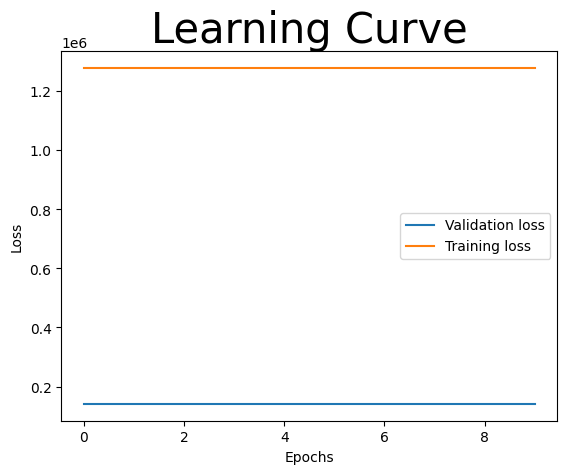

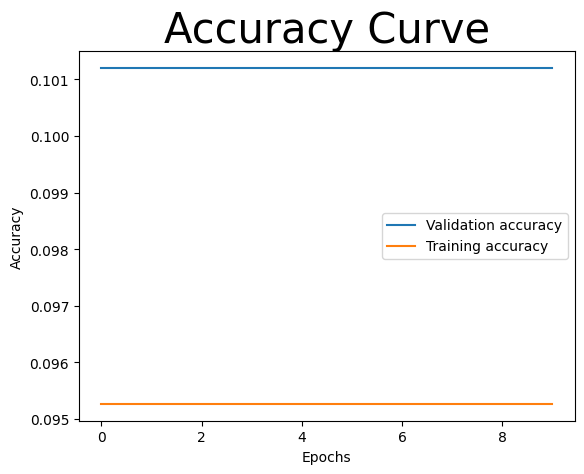

<Figure size 640x480 with 0 Axes>

In [43]:
# learning curve
def learning_curve(v_loss_list, t_loss_list):
  plt.title(label="Learning Curve", fontsize =30)
  plt.plot(range(len(v_loss_list)), v_loss_list, label='Validation loss')
  plt.plot(range(len(t_loss_list)), t_loss_list, label ='Training loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()
  plt.savefig('/content/drive/MyDrive/cifar-10_basicmodel'+'_learningCuve'+str(total_epochs)+str(execution))
 
def accuracy_curve(v_accuracy_list, t_accuracy_list):
  plt.title(label="Accuracy Curve", fontsize =30)
  plt.plot(range(len(v_accuracy_list)), v_accuracy_list, label='Validation accuracy')
  plt.plot(range(len(t_accuracy_list)), t_accuracy_list, label ='Training accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()
  plt.savefig('/content/drive/MyDrive/cifar-10_basicmodel'+'_accuracyCuve'+str(total_epochs)+str(execution))

learning_curve(v_loss_list, t_loss_list)

accuracy_curve(v_accuracy_list, t_accuracy_list)

In [ ]:
"""# functions from  https://machinelearningmastery.com/training-and-validation-data-in-pytorch/
def plot_train_val_loss(train_err, val_err):
  plt.semilogx(np.array(learning_rates), train_err.numpy(), label = 'total training loss')
  plt.semilogx(np.array(learning_rates), val_err.numpy(), label = 'total validation loss')
  plt.ylabel('Total Loss')
  plt.xlabel('learning rate')
  plt.legend()
  plt.show()
  



# plotting the predictions on validation data
def plot_predictions(model, learning_rate, x_val, val_prediction):
  for model, learning_rate in zip(Models, learning_rates):
      yhat = model(x_val)
      plt.plot(x_val.numpy(), val_prediction.detach().numpy(), label = 'learning rate:' + str(learning_rate))
  #plt.plot(x_val.numpy(), val_set.func.numpy(), 'or', label = 'validation data')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.legend()
  plt.show()
  """